In [1]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
table=pd.read_excel(r'C:\Users\ad\Documents\RESUME_PROJECTS\covid19 on folium map\covid_india_latest.xlsx')

In [68]:
#table.rename(columns={'COUNTRY':'name'},inplace=True)

In [6]:
table.head(7)

,Location,Cases,Deaths,Recovery
0,United States,33811902,610837,No data
1,India,30458251,400312,29548302
2,Brazil,18687469,521952,16989351
3,France,5777965,111140,No data
4,Russia,5585799,137262,5053417
5,Turkey,5440368,49874,5310769
6,United Kingdom,4879616,128207,No data


In [7]:
world=geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [8]:
world['name'].replace(to_replace='United States of America',value='United States',inplace=True)


In [9]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
#mearging 2 data
df=world.merge(table,how='left',left_on='name',right_on='Location')

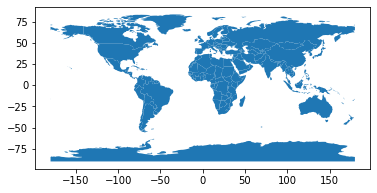

In [11]:
df.plot()

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.drop(columns=['pop_est','continent','iso_a3','gdp_md_est'],inplace=True)

In [14]:
df.head()

,name,geometry,Location,Cases,Deaths,Recovery
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,5639.0,27,1101
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1416557.0,26347,1383928
4,United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,33811902.0,610837,No data
5,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,430928.0,4418,399279
6,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,111648.0,742,108009


In [15]:
df['Deaths']=pd.to_numeric(df['Deaths'])
#df['Recovery']=pd.to_numeric(df['Recovery'])

In [16]:
df.iloc[2,5]

'No data'

In [29]:
no_data=np.where(df.iloc[:,5]=='No data')
no_data

(array([ 28,  36,  38,  96, 109, 115, 116, 118, 119, 122, 125, 128, 135,
        137, 144, 153], dtype=int64),)

In [36]:
for i in no_data:
    df.iloc[i,5]='1000'
    print (df.iloc[i,5])

35     1000
43     1000
45     1000
110    1000
123    1000
129    1000
130    1000
132    1000
133    1000
137    1000
140    1000
143    1000
150    1000
152    1000
161    1000
172    1000
Name: Recovery, dtype: object


In [38]:
df['Recovery']=pd.to_numeric(df['Recovery'])

In [50]:
#my_map=folium.Map()
#folium.Choropleth(geo_data=df,name='choropleth',data=df,columns=['name','Cases'],
#                 key_on='feature.properties.name',
#                 fill_color='YlGn',
#                 fill_opacity=0.7,
#                  line_opacity=0.2,
#                 legend_name='TOTAL COVID CASES').add_to(my_map)
#my_map.save('covid_latest.html')

In [51]:
df.crs = "epsg:4326"

In [52]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(-198.00000000000003, 198.00000000000009, -98.6822565, 92.32738650000002)

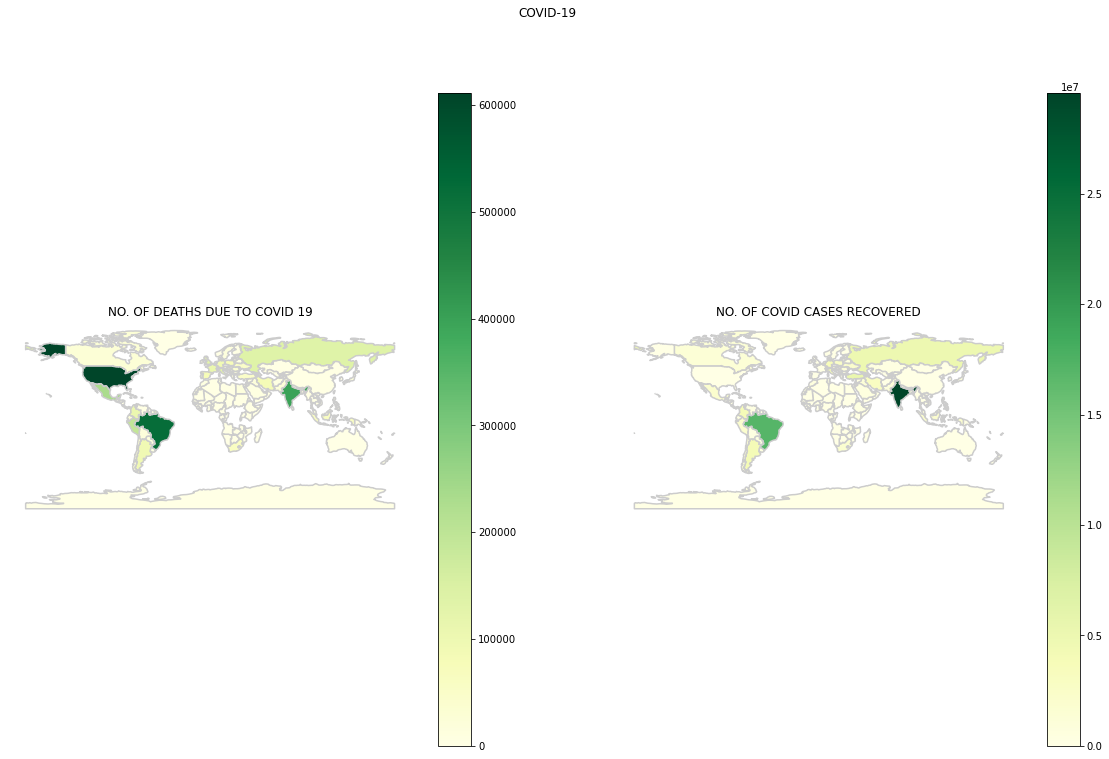

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,12))
fig.suptitle('COVID-19',fontdict={'fontsize':40,'fontweight':10})
df.plot(column='Deaths',ax=ax1,cmap='YlGn',figsize=(20,12),legend=True,linewidth=1.5,edgecolor='0.8')
ax1.set_title('NO. OF DEATHS DUE TO COVID 19')
ax1.axis('off')
#ax1.get_legend().set_bbox_to_anchor((.10,.10))

ax1.get_figure()


df.plot(column='Recovery',ax=ax2,cmap='YlGn',figsize=(20,12),legend=True,linewidth=1.5,edgecolor='0.8')
ax2.set_title('NO. OF COVID CASES RECOVERED')
ax2.axis('off')
#ax2.get_legend().set_bbox_to_anchor((.10,.10))



In [54]:
my_map=folium.Map()
folium.Choropleth(
    geo_data=df,   #mearged dataset
    name='choropleth',
    data=df,
    columns=['name','Deaths'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Meat consumption'
).add_to(my_map)
#my_map.save('covid-19deathanalysis.html')


In [48]:
folium.TileLayer('openstreetmap').add_to(my_map)
# other mapping code (e.g. lines, markers etc.)
folium.LayerControl().add_to(my_map)
my_map.save('covid-19deathanalysis.html')